# IGM_Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from decimal import Decimal, getcontext
import Lya_zelda as Lya
import itertools
import h5py

from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

**Predicting the IGM effect**

In [2]:
# Reading the corrected data from Laursen et al 2011:
Laursen_T = np.loadtxt('Laursen_corrected.txt')

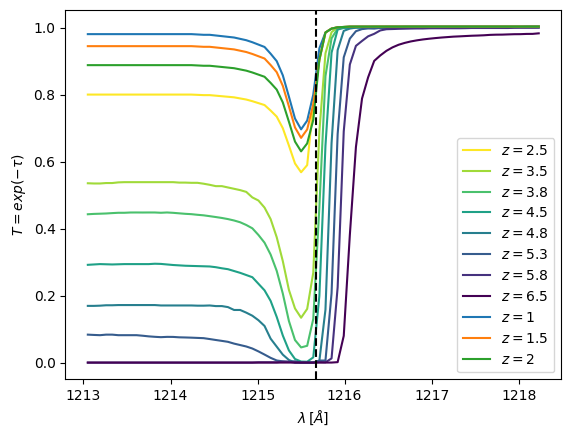

In [3]:
colors = plt.cm.viridis(np.linspace(0, 1, 8))

plt.plot(Laursen_T[:,0],Laursen_T[:,1],color=colors[7],label=r'$z=2.5$')
plt.plot(Laursen_T[:,0],Laursen_T[:,2],color=colors[6],label=r'$z=3.5$')
plt.plot(Laursen_T[:,0],Laursen_T[:,3],color=colors[5],label=r'$z=3.8$')
plt.plot(Laursen_T[:,0],Laursen_T[:,4],color=colors[4],label=r'$z=4.5$')
plt.plot(Laursen_T[:,0],Laursen_T[:,5],color=colors[3],label=r'$z=4.8$')
plt.plot(Laursen_T[:,0],Laursen_T[:,6],color=colors[2],label=r'$z=5.3$')
plt.plot(Laursen_T[:,0],Laursen_T[:,7],color=colors[1],label=r'$z=5.8$')
plt.plot(Laursen_T[:,0],Laursen_T[:,8],color=colors[0],label=r'$z=6.5$')

plt.plot(Laursen_T[:,0],Laursen_T[:,9],color='C0',label=r'$z=1$')
plt.plot(Laursen_T[:,0],Laursen_T[:,10],color='C1',label=r'$z=1.5$')
plt.plot(Laursen_T[:,0],Laursen_T[:,11],color='C2',label=r'$z=2$')



plt.axvline(x=1215.67, color='k', linestyle='--', alpha=1)
plt.xlabel(r'$\lambda \, [\AA]$')
plt.ylabel(r'$T=exp(-\tau)$')
plt.legend()

In [4]:
# Preparing the data:
T_arrays = np.column_stack((Laursen_T[:,11], Laursen_T[:,10], Laursen_T[:,9], Laursen_T[:,8], Laursen_T[:,7], Laursen_T[:,6], Laursen_T[:,5], Laursen_T[:,4], Laursen_T[:,3], Laursen_T[:,2], Laursen_T[:,1]))
z_laursen = [2, 1.5, 1, 6.5, 5.5, 5.3, 4.8, 4.3, 3.8, 3.5, 2.5]

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [6]:
%%time

# Create a Random Forest Regression model as the base model
base_model = RandomForestRegressor(n_estimators=2000)  # You can adjust the number of estimators as needed


# Create a MultiOutputRegressor with the Decision Tree model
model = MultiOutputRegressor(base_model)

# X is z_laursen and y is T_arrays
X = np.array(z_laursen).reshape(-1, 1)
y = T_arrays.T  # Transpose T_arrays to match the number of samples

# Train the multi-output Random Forest model
model.fit(X, y)


CPU times: user 39.8 s, sys: 307 ms, total: 40.1 s
Wall time: 40.1 s


MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=2000))

Example

In [7]:
# Specify the redshift value for which you want to predict
new_redshift = 2.9  # Replace with the desired redshift value

# Make predictions for all the transmission functions at the fixed wavelengths
predicted_transmissions = model.predict(np.array([[new_redshift]]).reshape(-1, 1))

# predicted_transmissions now contains the predicted transmission functions for the specified redshift
print(predicted_transmissions)

[[0.71375127 0.70835812 0.70813668 0.70797765 0.71100211 0.7086363
  0.71198199 0.71139678 0.71281663 0.714052   0.70846794 0.71211729
  0.71679926 0.71294294 0.71651313 0.711193   0.71003392 0.71029105
  0.70950602 0.70899482 0.70453232 0.69704042 0.70404    0.70623219
  0.6960611  0.69752409 0.69150217 0.68298726 0.67409565 0.65921068
  0.64165984 0.61419089 0.5716178  0.50093549 0.45011356 0.43020348
  0.44838273 0.60547841 0.81856556 0.95913311 0.99219299 1.00064863
  1.00155797 1.00258626 1.00264769 1.00262712 1.00262406 1.00287021
  1.0028676  1.00287542 1.00286822 1.00287143 1.002913   1.00291203
  1.00291251 1.00291154 1.00291203 1.00291251 1.00291154 1.00291106
  1.00291203 1.00291203 1.00291154 1.00291203 1.00291251 1.00291251
  1.00291251 1.00291251 1.00291203 1.00291154 1.00291251 1.00291106
  1.002913   1.002913   1.002913  ]]


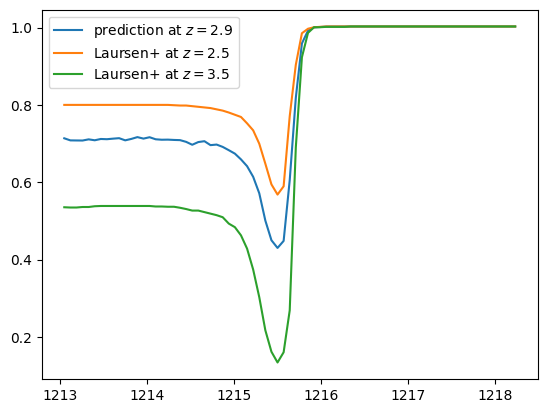

In [8]:
plt.plot(Laursen_T[:,0], predicted_transmissions[0],label='prediction at $z=2.9$')
plt.plot(Laursen_T[:,0],Laursen_T[:,1],label='Laursen+ at $z=2.5$')
plt.plot(Laursen_T[:,0],Laursen_T[:,2],label='Laursen+ at $z=3.5$')
plt.legend()

In [9]:
%%time
import joblib

joblib.dump(model, 'multioutput_model_Transmission_function_new.pkl')

CPU times: user 12.4 s, sys: 420 ms, total: 12.8 s
Wall time: 12.9 s


['multioutput_model_Transmission_function_new.pkl']

In [10]:
# how to load the saved model:
loaded_model = joblib.load('multioutput_model_Transmission_function.pkl')

# Now you can make predictions using the loaded model
new_redshift = 2.9  # Replace with the desired redshift value
predicted_transmissions = loaded_model.predict(np.array([[new_redshift]]).reshape(-1, 1))

# predicted_transmissions now contains the predicted transmission functions for the specified redshift
print(predicted_transmissions)

[[0.71256117 0.71152193 0.70857609 0.71119097 0.70738825 0.71151911
  0.71296931 0.70809846 0.71099115 0.70775932 0.71011562 0.71195074
  0.70975572 0.71316873 0.71962149 0.70924634 0.71132081 0.7093514
  0.70486092 0.71313894 0.7037379  0.71039492 0.70529184 0.70392692
  0.69339448 0.69576702 0.6862344  0.68499648 0.67282489 0.66392827
  0.6420118  0.60923199 0.56553838 0.5047764  0.45740924 0.41674174
  0.43953612 0.60321123 0.81489193 0.95980786 0.99215124 1.00065349
  1.00156331 1.00259597 1.00263199 1.00262478 1.00264618 1.00286443
  1.00286857 1.00286748 1.00286564 1.00286818 1.00291203 1.00291106
  1.00291203 1.00291203 1.00291203 1.00291154 1.00291251 1.00291203
  1.00291154 1.00291106 1.00291251 1.00291106 1.002913   1.00291251
  1.00291154 1.00291106 1.00291154 1.00291154 1.00291203 1.00291154
  1.002913   1.002913   1.002913  ]]


In [11]:
%%time

# Range of new_redshift values
new_redshift_values = np.linspace(1.88, 3.52, 20)

# Create an array to store all predicted transmissions
predicted_transmissions_array = []

# Predict transmission functions for each redshift
for new_redshift in new_redshift_values:
    # Reshape the input to fit the model's expectations
    prediction = loaded_model.predict(np.array([[new_redshift]]).reshape(-1, 1))
    # Append the prediction to the array
    predicted_transmissions_array.append(prediction)

# Convert the list of predictions to a NumPy array
predicted_transmissions_array = np.array(predicted_transmissions_array)


CPU times: user 31.1 s, sys: 647 ms, total: 31.8 s
Wall time: 31.3 s


/var/folders/cn/n1v05h316l50_jrcqz9_mz0c0000gp/T/ipykernel_49619/1804433315.py:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=cbar_ticks)


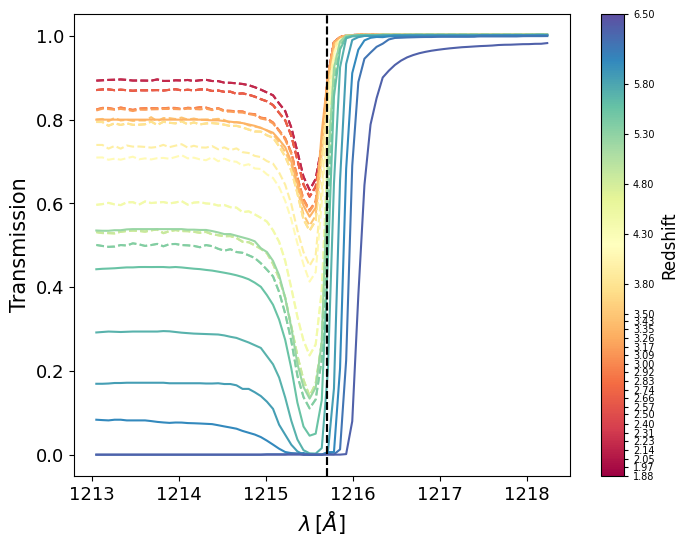

In [12]:
import seaborn as sns
from matplotlib.colors import Normalize, to_rgba
from matplotlib.cm import ScalarMappable


plt.figure(figsize=(8, 6))
colors_sns = sns.color_palette("Spectral", n_colors=28)
plt.plot(Laursen_T[:,0], predicted_transmissions_array[0, 0], linestyle='--', label=f'Prediction at $z=1.88$', color=colors_sns[0])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[1, 0], linestyle='--', label=f'Prediction at $z=1.97$', color=colors_sns[1])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[2, 0], linestyle='--', label=f'Prediction at $z=2.05$', color=colors_sns[2])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[3, 0], linestyle='--', label=f'Prediction at $z=2.14$', color=colors_sns[3])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[4, 0], linestyle='--', label=f'Prediction at $z=2.23$', color=colors_sns[4])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[5, 0], linestyle='--', label=f'Prediction at $z=2.31$', color=colors_sns[5])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[6, 0], linestyle='--', label=f'Prediction at $z=2.40$', color=colors_sns[6])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[7, 0], linestyle='--', label=f'Prediction at $z=2.48$', color=colors_sns[7])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[8, 0], linestyle='--', label=f'Prediction at $z=2.57$', color=colors_sns[9])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[9, 0], linestyle='--', label=f'Prediction at $z=2.66$', color=colors_sns[10])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[10, 0], linestyle='--', label=f'Prediction at $z=2.74$', color=colors_sns[11])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[11, 0], linestyle='--', label=f'Prediction at $z=2.83$', color=colors_sns[12])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[12, 0], linestyle='--', label=f'Prediction at $z=2.92$', color=colors_sns[13])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[13, 0], linestyle='--', label=f'Prediction at $z=3$', color=colors_sns[14])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[14, 0], linestyle='--', label=f'Prediction at $z=3.09$', color=colors_sns[15])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[15, 0], linestyle='--', label=f'Prediction at $z=3.17$', color=colors_sns[16])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[16, 0], linestyle='--', label=f'Prediction at $z=3.26$', color=colors_sns[17])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[17, 0], linestyle='--', label=f'Prediction at $z=3.35$', color=colors_sns[18])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[18, 0], linestyle='--', label=f'Prediction at $z=3.43$', color=colors_sns[19])
plt.plot(Laursen_T[:,0], predicted_transmissions_array[19, 0], linestyle='--', label=f'Prediction at $z=3.52$', color=colors_sns[21])



# Plot Laursen+ data at specific redshifts
plt.plot(Laursen_T[:,0], Laursen_T[:,1], color=colors_sns[8], label=r'$z=2.5$')
plt.plot(Laursen_T[:,0], Laursen_T[:,2], color=colors_sns[20], label=r'$z=3.5$')
plt.plot(Laursen_T[:,0], Laursen_T[:,3], color=colors_sns[22], label=r'$z=3.8$')
plt.plot(Laursen_T[:,0], Laursen_T[:,4], color=colors_sns[23], label=r'$z=4.3$')
plt.plot(Laursen_T[:,0], Laursen_T[:,5], color=colors_sns[24], label=r'$z=4.8$')
plt.plot(Laursen_T[:,0], Laursen_T[:,6], color=colors_sns[25], label=r'$z=5.3$')
plt.plot(Laursen_T[:,0], Laursen_T[:,7], color=colors_sns[26], label=r'$z=5.8$')
plt.plot(Laursen_T[:,0], Laursen_T[:,8], color=colors_sns[27], label=r'$z=6.5$')



cbar_ticks = np.concatenate([
    [1.88, 1.97, 2.05, 2.14, 2.23, 2.31, 2.40, 2.57, 2.66, 2.74, 2.83, 2.92, 3.0, 3.09, 3.17, 3.26, 3.35, 3.43],
    [2.5, 3.5, 3.8, 4.3, 4.8, 5.3, 5.8, 6.5]
])


# Create a ScalarMappable to map scalar data to colors
norm = Normalize(vmin=1.88, vmax=6.5)
sm = ScalarMappable(cmap='Spectral', norm=norm)
sm.set_array([])


plt.axvline(x=1215.7, color='k', linestyle='--', alpha=1)


cbar = plt.colorbar(sm, ticks=cbar_ticks)
cbar.set_label('Redshift', fontsize=12)


# Adjust the size of ticks and tick labels
cbar.ax.tick_params(axis='both', which='both', length=3, labelsize=7)


plt.xlabel(r'$\lambda\,[\AA]$',fontsize=15)
plt.ylabel('Transmission',fontsize=15)

# Adjust the size of ticks and tick labels
plt.tick_params(axis='both', which='both', labelsize=13)  # Adjust labelsize as needed

plt.axvline(x=1215.7, color='k', linestyle='--', alpha=1)


**Running zELDA**

Here we use **zELDA** code (written by Siddhartha Gurung-Lopez, see [zELDA paper](https://ui.adsabs.harvard.edu/abs/2022MNRAS.510.4525G/abstract)). in your terminal environment do the following before using this function: 

**pip install zelda**

and download the Grids as follows:

**curl --cookie zenodo-cookies.txt "https://zenodo.org/record/4733518/files/Grids.zip?download=1" --output Grids.zip**

then unzip it


In [13]:
%%time
your_grids_location = '/Volumes/Hasti-2T-2/main/zelda/Grids/'
Lya.funcs.Data_location = your_grids_location
Geometry = 'Thin_Shell_Cont'
LyaRT_Grid = Lya.load_Grid_Line( Geometry )

CPU times: user 1.75 ms, sys: 4.36 s, total: 4.37 s
Wall time: 13.7 s


In [14]:
Lbins = np.arange(1213.05, 1218.23, 0.07)
w_Lya = 1215.67 # Lyman-alpha wavelength
wavelength_Arr = np.linspace( w_Lya-10 , w_Lya+10 , len(Lbins) ) * 1e-10

In [15]:
%%time
# If you loaded the trained model above you don't need to load it here again
loaded_model = joblib.load('multioutput_model_Transmission_function.pkl')


CPU times: user 9.9 s, sys: 510 ms, total: 10.4 s
Wall time: 11.3 s


In [16]:
a = 0.258000  #the scale factor is shown in the name of the data:  "sfr_catalog_0.258000.bin"
redshift = (1/a) -1
print(redshift)

2.875968992248062


In [17]:
%%time
# Now you can make predictions using the loaded model
predicted_transmissions = loaded_model.predict(np.array([[redshift]]).reshape(-1, 1))

# predicted_transmissions now contains the predicted transmission functions for the specified redshift
print(predicted_transmissions)

[[0.73971001 0.73971701 0.73096941 0.73731398 0.73079485 0.7384001
  0.73566392 0.73602798 0.73495763 0.73327219 0.73496161 0.73987766
  0.734431   0.73801472 0.74144094 0.73335186 0.73772495 0.73381606
  0.73339091 0.73702439 0.72932896 0.73400595 0.72737467 0.73151051
  0.72248542 0.72040225 0.71364426 0.71057792 0.7010637  0.69512826
  0.6737811  0.64466605 0.5983423  0.53570485 0.48377144 0.45126677
  0.47668501 0.63529576 0.83998926 0.966703   0.99359298 1.00086322
  1.00166915 1.00264695 1.00266603 1.00265272 1.00267387 1.00289491
  1.00289854 1.00289898 1.00289739 1.0028951  1.00291203 1.00291106
  1.00291203 1.00291203 1.00291203 1.00291154 1.00291251 1.00291203
  1.00291154 1.00291106 1.00291251 1.00291106 1.002913   1.00291251
  1.00291154 1.00291106 1.00291154 1.00291154 1.00291203 1.00291154
  1.002913   1.002913   1.002913  ]]
CPU times: user 1.58 s, sys: 66.6 ms, total: 1.64 s
Wall time: 1.6 s


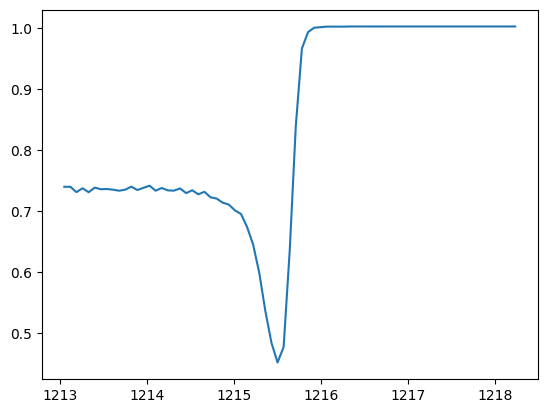

In [18]:
plt.plot(Laursen_T[:,0], predicted_transmissions[0],label='prediction at $z=2.88$')

We compute and save the vexp, NHI and tau_a since we need them to compute the line profile here.

In [19]:
# Define constants and cosmology
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307115)
littleh = cosmo.H0.value / 100.0
Mpcph = u.def_unit('Mpcph', u.Mpc / littleh)  # [Mpc/h]
Msunph = u.def_unit('Msunph', u.Msun / littleh)  # [Msun/h]
kpcph = u.def_unit('kpcph', u.kpc / littleh)  # [kpc/h]

In [20]:
# load the data including scaling relation and luminosiy cut.

dat = np.load("sfr_catalog_0.258000_w_scaling_relations_masked_L41_pos400.npy", allow_pickle=True)


In [21]:
def calculate_v_exp(alpha, data, h5_filename):
    """
    Calculates the v_exp using the parametrization: v_exp = alpha * SFR * (r/sm)
    and saves into a .h5 file
    
    Inputs:
    -------
    alpha --> free parameter
    data --> load the catalog to get sfr, sm and galaxy size.
    
    Returns:
    --------
    v_exp --> expansion velocity of the thin shell. (array: (shape=(N,)) --> [unit: km/s]
    
    """
    sm = data["sm"]
    sfr = data["sfr"]
    size = data["size"]

    myr = 10 ** size
    sm_h = ((sm * u.Msun).to(Msunph)).value
    sfr_h_s = ((sfr * u.Msun / u.yr).to(Msunph / u.s)).value
    myr_km = ((myr * u.kpc).to(u.km)).value
    v_exp = alpha * sfr_h_s * (myr_km / sm_h)

    # Save the result in the HDF5 file with alpha and beta information
    with h5py.File(h5_filename, 'w') as file:
        # Create a group with the current alpha value
        group_name = f'alpha_{alpha}'
        group = file.create_group(group_name)

        # Save the v_exp dataset within the group
        dset_v_exp = group.create_dataset('v_exp_Arr', data=v_exp, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

        # Add attributes to the group to store alpha value
        group.attrs['alpha'] = alpha

    #print('vexp is done!')
    return v_exp


In [22]:
def calculate_N_HI(alpha, beta, data, h5_filename):
    """
    Calculates the N_HI using the parametrization: N_HI = beta * (mcold/4*pi*m_H*r**2)
    and saves into a .h5 file
    
    Inputs:
    -------
    alpha --> free parameter
    beta --> free parameter
    data --> load the catalog to get mcold and zcold.
    
    Returns:
    --------
    N_HI --> column density of hydrogen of the thin shell. (array: (shape=(N,)) --> [unit: 1/cm2]
    
    """
    mcold = data["mcold"]
    zcold = data["zcold"]
    sample_M_cold_not_log = 10 ** mcold
    # Vectorize the Decimal conversion function
    decimal_converter = np.vectorize(lambda x: Decimal(str(x)))
    sample_M_cold_not_log_decimal = decimal_converter(sample_M_cold_not_log)
    result_decimal = sample_M_cold_not_log_decimal * Decimal("1.9891e30")
    mcold_nolog = np.array(result_decimal, dtype=float)
    M_c = (mcold_nolog / 0.70)
    myr = 10 ** data["size"]
    myr_km = ((myr * u.kpc).to(u.km)).value
    myr_cm = ((myr_km * u.km).to(u.cm)).value
    # Use NumPy vectorized operations for the remaining calculations
    getcontext().prec = 50
    rrr_decimal = np.array(myr_cm, dtype=object)  # Using dtype=object to handle Decimal
    rrr_decimal = np.vectorize(Decimal)(rrr_decimal)
    result_decimal_rrr = 1 / rrr_decimal ** 2
    myr_cm_new = np.array(result_decimal_rrr, dtype=float)
    N_HI_new = beta * (M_c * myr_cm_new)

    # Save the result in the HDF5 file with alpha and beta information
    with h5py.File(h5_filename, 'w') as file:
        # Create a group with the current alpha and beta values
        group_name = f'alpha_{alpha}_beta_{beta}'
        group = file.create_group(group_name)

        # Save the N_HI dataset within the group
        dset_N_HI = group.create_dataset('N_HI_Arr', data=N_HI_new, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

        # Add attributes to the group to store alpha and beta values
        group.attrs['alpha'] = alpha
        group.attrs['beta'] = beta

    #print('NHI is done!')
    return N_HI_new



In [23]:
def calculate_tau(alpha, beta, data, h5_filename):
    
    """
    Calculates the tau (dust optical depth) using the parametrization:  (1 - A_Lya) * (E_Sun / Z_Sun) * N_HI * Z_c
    and saves into a .h5 file
    
    Inputs:
    -------
    alpha --> free parameter
    beta --> free parameter
    data --> load the catalog to get mcold and zcold.
    
    Returns:
    --------
    tau_a --> dust optical depth. (array: (shape=(N,))
    
    """
    
    N_HI_new = calculate_N_HI(alpha, beta, data, h5_filename)  # Pass the h5_filename to calculate_N_HI

    A_Lya = 0.39
    E_Sun = 1.77e-21
    Z_Sun = 0.02
    Z_c = 10 ** data["zcold"]
    tau_new = (1 - A_Lya) * (E_Sun / Z_Sun) * N_HI_new * Z_c

    # Save the result in the HDF5 file with alpha and beta information
    with h5py.File(h5_filename, 'a') as file:  # Open the file in 'a' (append) mode
        # Get the existing group with the current alpha and beta values
        group_name = f'alpha_{alpha}_beta_{beta}'
        group = file[group_name]

        # Save the tau dataset within the group
        dset_tau = group.create_dataset('tau_Arr', data=tau_new, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

    #print('tau is done!')
    return tau_new


In [24]:
%%time


# Define the range of values for alpha and beta
# Here I just run it for one example of alpha and beta:
alpha_values = np.array([105])
betaa_values = np.array([2e-4])



# Define the range of values for alpha and beta
#alpha_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
#                        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
#                        185, 190, 195, 200])
#betaa_values = np.array([0.6e-4, 0.7e-4, 0.8e-4, 0.9e-4, 1e-4,
#                        1.1e-4, 1.2e-4, 1.3e-4, 1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4, 1.9e-4, 2e-4,
#                        2.1e-4, 2.2e-4, 2.3e-4, 2.4e-4, 2.5e-4, 2.6e-4, 2.7e-4, 2.8e-4, 2.9e-4, 3e-4,
#                        3.1e-4, 3.2e-4, 3.3e-4, 3.4e-4, 3.5e-4, 3.6e-4, 3.7e-4, 3.8e-4, 3.9e-4, 4e-4,
#                        4.1e-4, 4.2e-4, 4.3e-4, 4.4e-4, 4.5e-4, 4.6e-4, 4.7e-4, 4.8e-4, 4.9e-4, 5e-4])


M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
beta_values = (betaa_values)/(4*np.pi*m_H)

# Use itertools.product to generate all combinations
combinations = list(itertools.product(alpha_values, beta_values))



for alpha, beta in combinations:
    print(f"Calculating for alpha = {alpha}, beta = {beta}")

    # Create an HDF5 file for the current combination with compression and chunking
    
    # Calculate V_Arr and save in HDF5
    h5_filename = f'v_exp_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    V_Arr = calculate_v_exp(alpha, dat, h5_filename)
    with h5py.File(h5_filename, 'a') as file:
        dset = file.create_dataset('V_Arr', data=V_Arr, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

    # Calculate NHI and save in HDF5
    h5_filename = f'NHI_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    NHI = calculate_N_HI(alpha, beta, dat, h5_filename)
    with h5py.File(h5_filename, 'a') as file:
        dset = file.create_dataset('NHI', data=NHI, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

    # Calculate tau and save in HDF5
    h5_filename = f'tau_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    tau = calculate_tau(alpha, beta, dat, h5_filename)
    with h5py.File(h5_filename, 'a') as file:
        dset = file.create_dataset('tau', data=tau, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))



Calculating for alpha = 105, beta = 9.530236113287146e+21
CPU times: user 15.2 s, sys: 969 ms, total: 16.1 s
Wall time: 16.3 s


Computing the line profile and f_esc_IGM

In [25]:
%%time

# Define the range of values for alpha and beta
# Here I just run it for one example of alpha and beta:
alpha_values = np.array([105])
betaa_values = np.array([2e-4])


#alpha_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
#                        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
#                        185, 190, 195, 200])
#betaa_values = np.array([0.6e-4, 0.7e-4, 0.8e-4, 0.9e-4, 1e-4,
#                        1.1e-4, 1.2e-4, 1.3e-4, 1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4, 1.9e-4, 2e-4,
#                        2.1e-4, 2.2e-4, 2.3e-4, 2.4e-4, 2.5e-4, 2.6e-4, 2.7e-4, 2.8e-4, 2.9e-4, 3e-4,
#                        3.1e-4, 3.2e-4, 3.3e-4, 3.4e-4, 3.5e-4, 3.6e-4, 3.7e-4, 3.8e-4, 3.9e-4, 4e-4,
#                        4.1e-4, 4.2e-4, 4.3e-4, 4.4e-4, 4.5e-4, 4.6e-4, 4.7e-4, 4.8e-4, 4.9e-4, 5e-4])


M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
beta_values = (betaa_values)/(4*np.pi*m_H)

# Use itertools.product to generate all combinations
combinations = list(itertools.product(alpha_values, beta_values))


# Loop over all combinations
for alpha, beta in combinations:
    print(f"Calculating for alpha = {alpha}, beta = {beta}")

    # Create an HDF5 file for the current combination with compression and chunking
    h5_filename = f'f_esc_IGM_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'

    h5_filename_v_exp = f'v_exp_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    h5_filename_NHI = f'NHI_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    h5_filename_tau = f'tau_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'

    
    with h5py.File(h5_filename_v_exp, 'r') as file:
        V_Arr = file['V_Arr'][:]
    with h5py.File(h5_filename_NHI, 'r') as file:
        NHI = file['NHI'][:]
    with h5py.File(h5_filename_tau, 'r') as file:
        tau = file['tau'][:]

    
    logNH_Arr = np.log10(NHI)
    ta_Arr = np.log10(tau)
    
    del NHI
    del tau
    
    # This should be replaced by real values for EW coming from SED fitting.
    logEW_Arr = np.random.uniform(1, 1.5, len(V_Arr)) # Logarithmic the intrinsic equivalent width [A]
    Wi_Arr = np.full(np.shape(V_Arr),0.05) #np.random.uniform(0.1, 0.8, len(vexp)) # Intrinsic width of the line [A]
    # Calculate Line_Profile
    Line_Profile = Lya.RT_Line_Profile( Geometry , wavelength_Arr , V_Arr , logNH_Arr , ta_Arr , logEW_Arr=logEW_Arr , Wi_Arr=Wi_Arr )

    del V_Arr
    del logNH_Arr
    del ta_Arr
    del logEW_Arr
    del Wi_Arr
    
    # Calculate integrals using NumPy's np.trapz
    integrals_denominator = np.trapz(Line_Profile, x=wavelength_Arr * 1e10, axis=1)  # Integration along the last axis
    integrals_numerator = np.trapz(Line_Profile * predicted_transmissions[0], x=wavelength_Arr * 1e10, axis=1)

    #del Line_Profile
    
    # Calculate f_IGM
    f_IGM = integrals_numerator / integrals_denominator


    # Save the result in the HDF5 file
    with h5py.File(h5_filename, 'w') as file:
        dset = file.create_dataset('f_IGM', data=f_IGM, compression="gzip", compression_opts=9, chunks=True, maxshape=(None,))

print("All calculations are done.")



Calculating for alpha = 105, beta = 9.530236113287146e+21


/opt/homebrew/lib/python3.11/site-packages/Lya_zelda/funcs.py:1693: RuntimeWarning: invalid value encountered in log10
  logta_Arr = np.log10( ta_Arr )


All calculations are done.
CPU times: user 1min 2s, sys: 5.91 s, total: 1min 8s
Wall time: 1min 19s


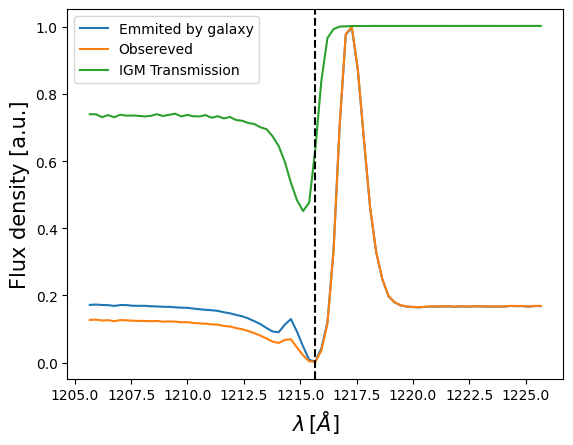

In [30]:
i = 98
normalization_fact = 79

plt.plot( wavelength_Arr *1e10 , normalization_fact*Line_Profile[i],label='Emmited by galaxy' )
plt.plot( wavelength_Arr *1e10 , normalization_fact*predicted_transmissions[0]*Line_Profile[i], label='Obsereved' )

plt.plot( wavelength_Arr *1e10 ,(predicted_transmissions[0]*Line_Profile[i])/ Line_Profile[i], label='IGM Transmission' )


plt.axvline(x=1215.67, color='k', linestyle='--', alpha=1)

plt.xlabel('$\lambda \, [\AA]$'       , size=15 )
plt.ylabel('Flux density [a.u.]' , size=15 )
plt.legend()